# 1 Setup

## 1.1 Install Libraries


In [28]:
!pip install -qq neo4j-driver
!pip install -qq py2neo pandas matplotlib sklearn

In [29]:
!rm -rf neo_lib.py
!wget -qq https://raw.githubusercontent.com/tadinve/neo4j-lib/master/neo_lib.py -O neo_lib.py
from neo_lib import Neo_lib

## 1.2 Setup Defaults

In [30]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1.3 Create and Login to Neo4j


1. Goto https://sandbox.neo4j.com
1. Login in with your gmail account
1. Create a blank database as shown below.


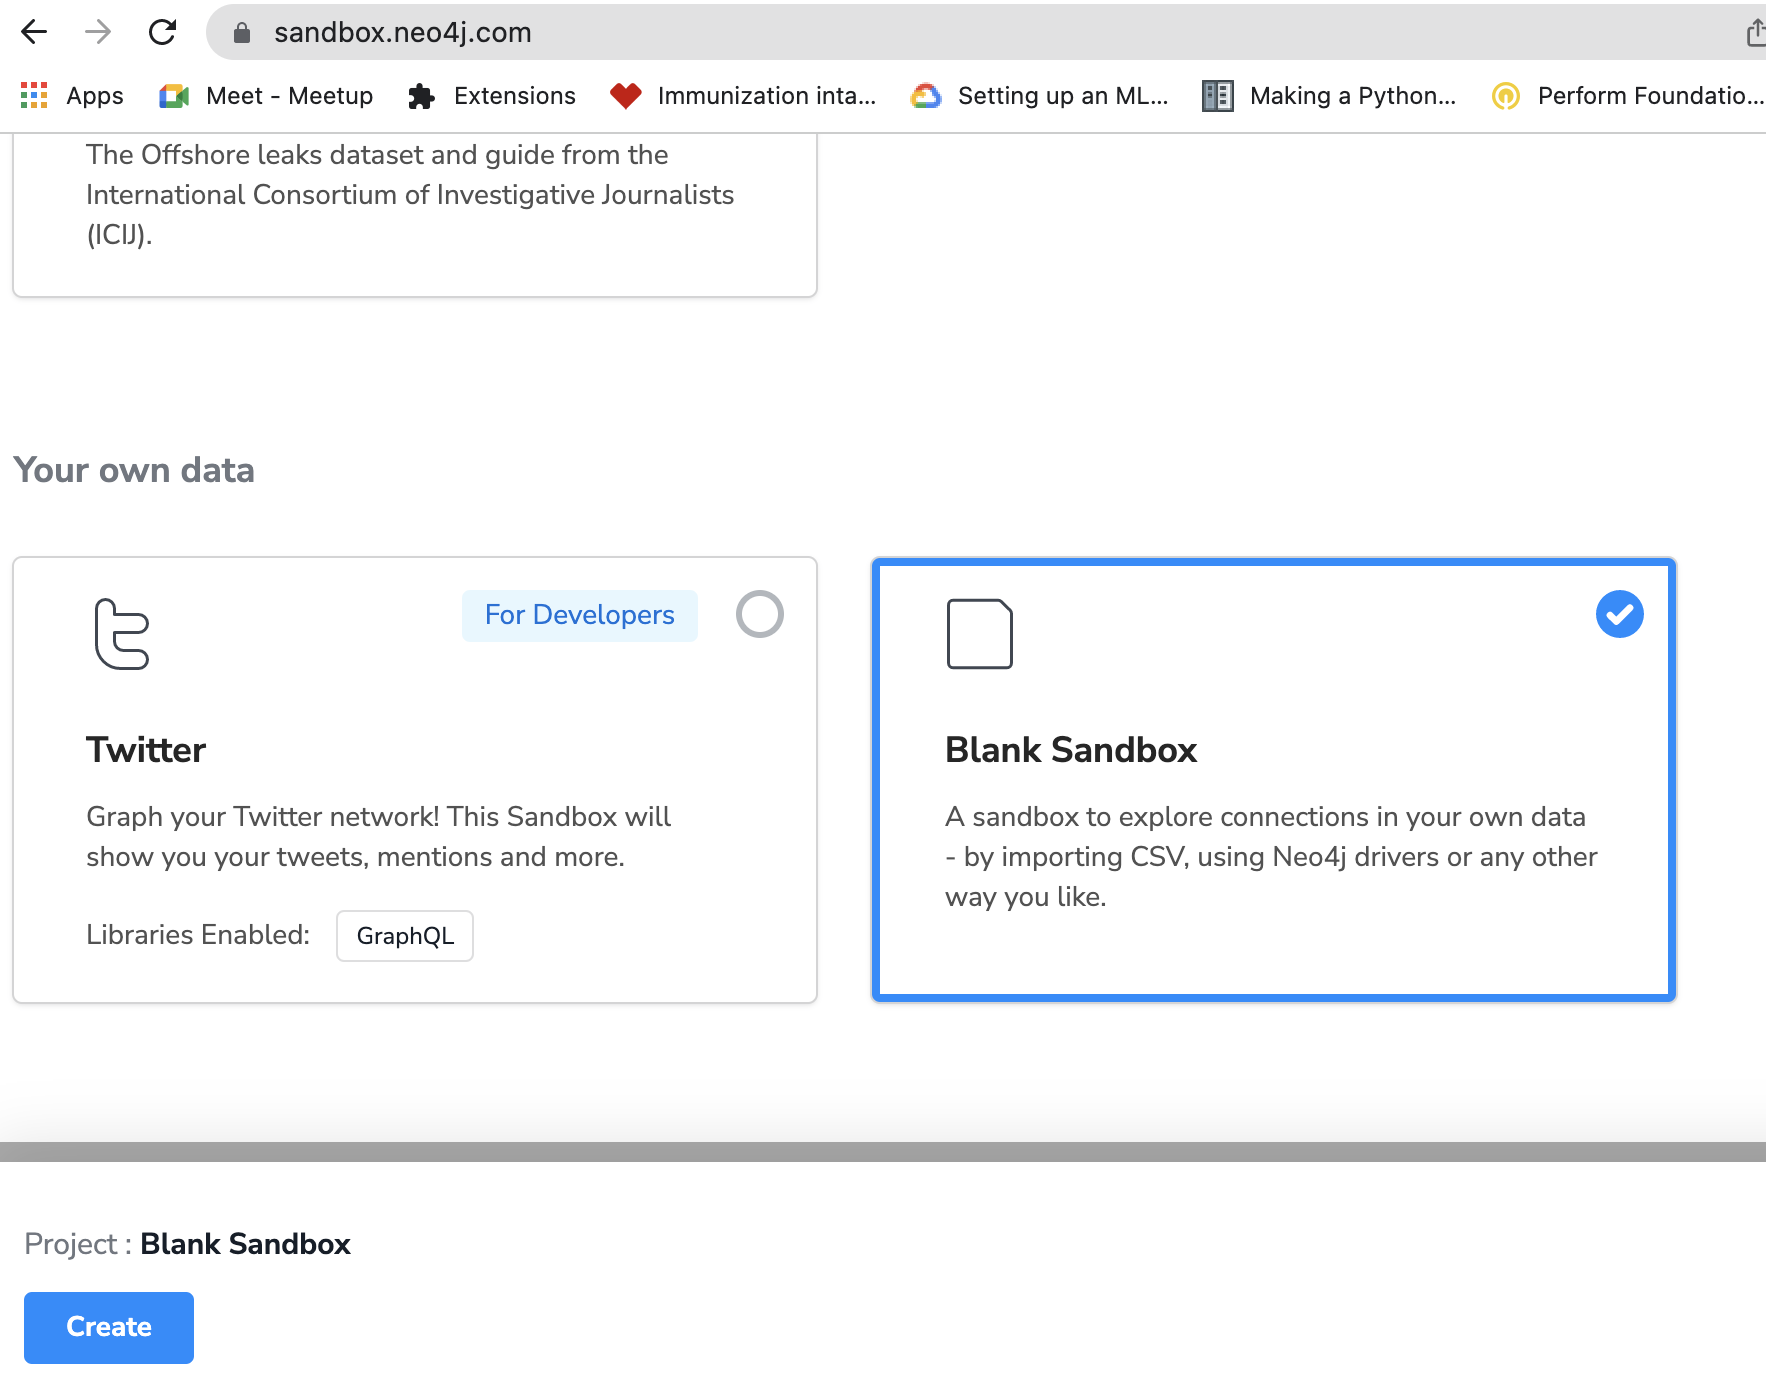

## 1.4 Connect to *Neo4j*

1. Open sandbox project you created.
1. Select the connectio tab as shown below.
1. Copy the url and password and update the cell below.

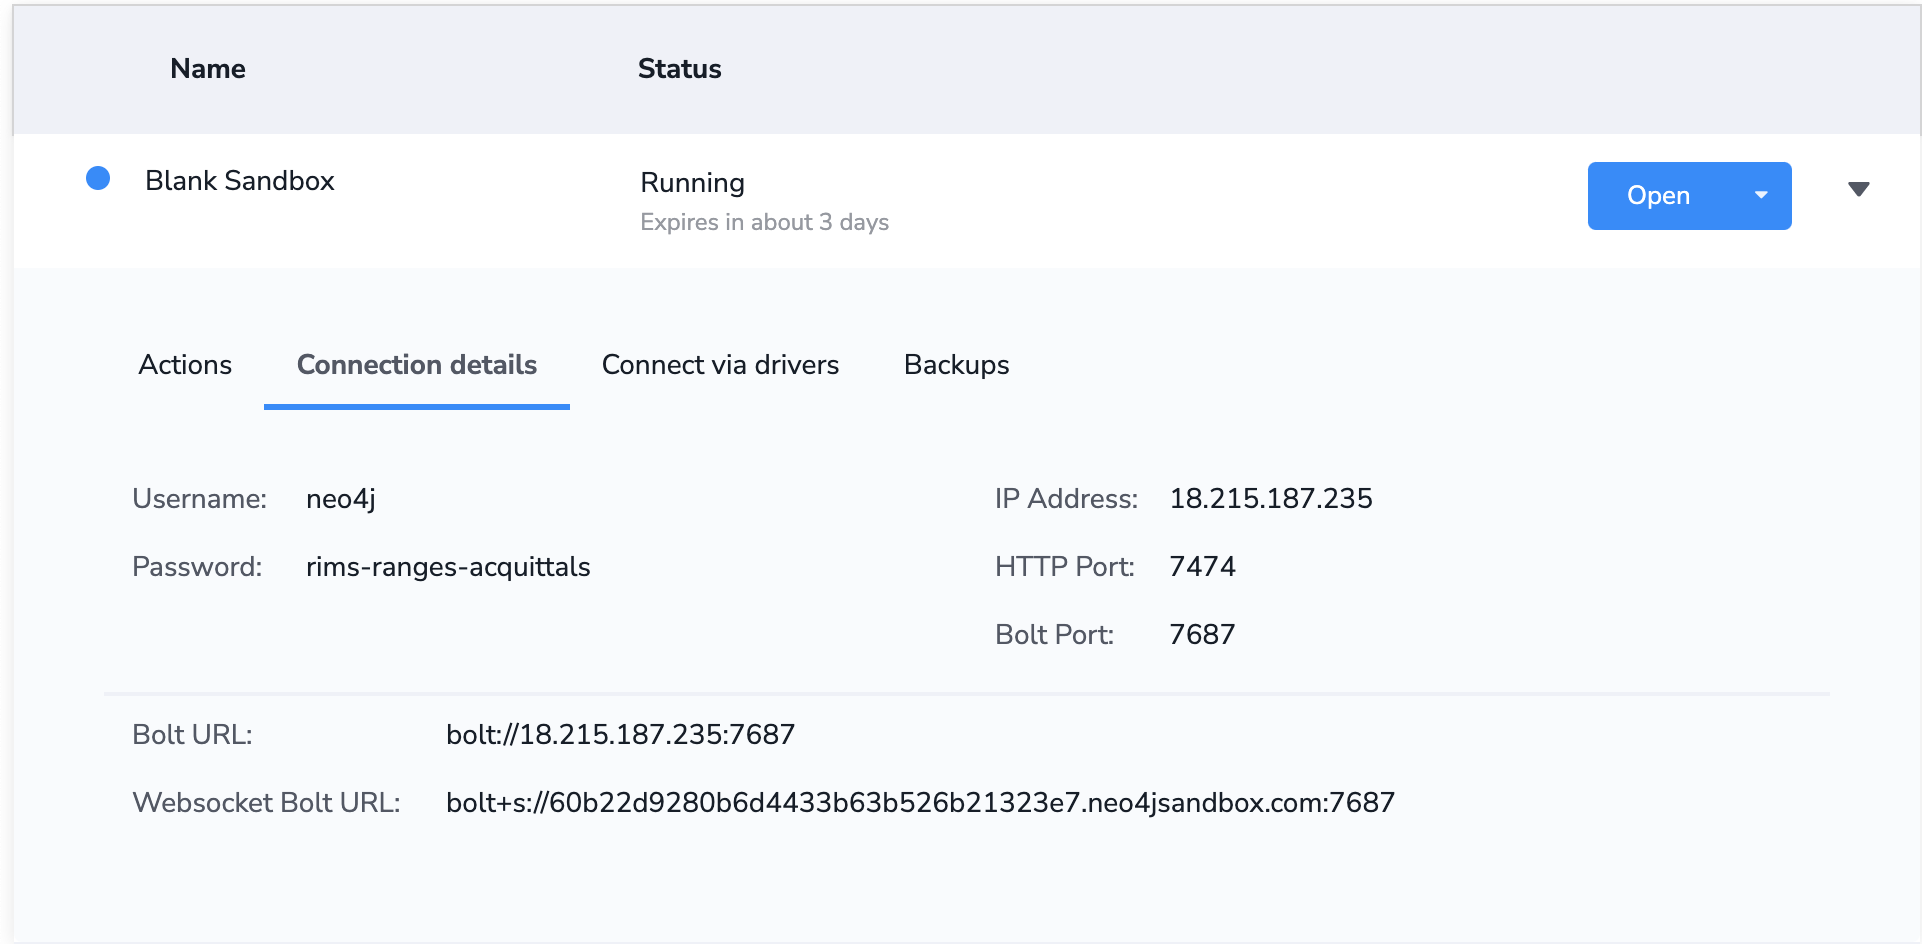

In [31]:
neo_url = "bolt://3.235.135.91:7687"
neo_user = "neo4j"
neo_pwd = "kite-bundle-battles"
neo_database = "neo4j"

nl = Neo_lib(neo_url, neo_user, neo_pwd,neo_database)

## 1.5 Reset Database

In [32]:
nl.get_stats()

,labelCount,relTypeCount,propertyKeyCount,nodeCount,relCount
0,2,6,8,171,253


In [33]:
nl.checksum()

440

In [34]:
nl.reset_db()

Dropping Constraint  constraint_550b2518
Dropping Constraint  constraint_751eb8ab


[]

In [35]:
nl.get_stats_all()

,labelCount,relTypeCount,propertyKeyCount,nodeCount,relCount,labels,relTypes,relTypesCount,stats
0,2,0,8,0,0,{},{},{},"{'relTypeCount': 0, 'propertyKeyCount': 8, 'la..."


In [36]:
nl.schema_view()

Run CALL db.schema.visualization() in Neo4j Browser to see a graphical view


[{'nodes': [{'constraints': [], 'indexes': ['released'], 'name': 'Movie'},
   {'constraints': [], 'indexes': ['born'], 'name': 'Person'}],
  'relationships': []}]

In [37]:
cq = "CALL db.propertyKeys()"
nl.run_cypher_pd(cq)

,propertyKey
0,name
1,born
2,title
3,released
4,tagline
5,roles
6,summary
7,rating


# 2 Load Data

## 2.1 Load Movies Database

### 2.1.1 Load Data

In [38]:
!rm -rf movies.cypher*
!wget -qq https://raw.githubusercontent.com/neo4j-graph-examples/movies/main/scripts/movies.cypher -O movies.cypher
with open('movies.cypher', 'r') as file:
    data = file.read()
nl.reset_db()
scripts = data.split(";")
for script in scripts:
    if len(script) > 1:
        nl.run_cypher(script)

### 2.1.2 View Summary

In [39]:
nl.get_stats()

,labelCount,relTypeCount,propertyKeyCount,nodeCount,relCount
0,2,6,8,171,253


In [40]:
nl.node_count()

,count
0,171


In [41]:
nl.label_count()

,Label,Count
0,Person,133
1,Movie,38


In [42]:
x = nl.schema_view()
y = x[0]['relationships']
for i in y:
    print(i[0]['name'],i[1],i[2]['name'])

Run CALL db.schema.visualization() in Neo4j Browser to see a graphical view
Person ACTED_IN Movie
Person REVIEWED Movie
Person PRODUCED Movie
Person WROTE Movie
Person FOLLOWS Person
Person DIRECTED Movie


In [43]:
cq = "MATCH (n) WHERE NOT (n)--() RETURN COUNT(n)"
nl.run_cypher(cq)

[{'COUNT(n)': 0}]

In [44]:
cq = "MATCH (n) WHERE NOT (n)--() RETURN n"
nl.run_cypher(cq)

[]

In [45]:
nl.relationship_count()

Run CALL db.schema.visualization() in Neo4j Browser to see a graphical view


,From,Relationship,To,Count
0,Person,ACTED_IN,Movie,344
1,Person,REVIEWED,Movie,18
2,Person,PRODUCED,Movie,30
3,Person,WROTE,Movie,20
4,Person,FOLLOWS,Person,6
5,Person,DIRECTED,Movie,88


In [46]:
df = nl.relationship_count()


Run CALL db.schema.visualization() in Neo4j Browser to see a graphical view


In [47]:
df.head()

,From,Relationship,To,Count
0,Person,ACTED_IN,Movie,344
1,Person,REVIEWED,Movie,18
2,Person,PRODUCED,Movie,30
3,Person,WROTE,Movie,20
4,Person,FOLLOWS,Person,6


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   From          6 non-null      object
 1   Relationship  6 non-null      object
 2   To            6 non-null      object
 3   Count         6 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


In [49]:
cq = """
match (n:Person {name:'Tom Hanks'})-[r]-(m:Movie)
return n.name,type(r),m.title
"""
nl.run_cypher(cq)

[{'m.title': 'Apollo 13', 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': "You've Got Mail", 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': 'A League of Their Own',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'Joe Versus the Volcano',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'That Thing You Do',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'The Da Vinci Code',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'Cloud Atlas', 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': 'Cast Away', 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': 'The Green Mile', 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': 'Sleepless in Seattle',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'The Polar Express',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': "Charlie Wilson's War",
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title':

In [50]:
cq = """
match (n:Person {name:'Tom Hanks'})-[r]-(m:Movie)
return n.name,type(r),m.title
"""
nl.run_cypher_pd(cq)

,n.name,type(r),m.title
0,Tom Hanks,ACTED_IN,Apollo 13
1,Tom Hanks,ACTED_IN,You've Got Mail
2,Tom Hanks,ACTED_IN,A League of Their Own
3,Tom Hanks,ACTED_IN,Joe Versus the Volcano
4,Tom Hanks,ACTED_IN,That Thing You Do
5,Tom Hanks,ACTED_IN,The Da Vinci Code
6,Tom Hanks,ACTED_IN,Cloud Atlas
7,Tom Hanks,ACTED_IN,Cast Away
8,Tom Hanks,ACTED_IN,The Green Mile
9,Tom Hanks,ACTED_IN,Sleepless in Seattle


In [51]:
cq = """
match (n:Person {name:'Tom Hanks'})-[r]-(m:Movie)
return n.name as Name,type(r) as Role,m.title as Title
"""
df = nl.run_cypher_pd(cq)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    13 non-null     object
 1   Role    13 non-null     object
 2   Title   13 non-null     object
dtypes: object(3)
memory usage: 440.0+ bytes


In [53]:
df.head()

,Name,Role,Title
0,Tom Hanks,ACTED_IN,Apollo 13
1,Tom Hanks,ACTED_IN,You've Got Mail
2,Tom Hanks,ACTED_IN,A League of Their Own
3,Tom Hanks,ACTED_IN,Joe Versus the Volcano
4,Tom Hanks,ACTED_IN,That Thing You Do


In [ ]:
df

# 3 Teaching Material

# 4 Excercises